In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Preparation

In [3]:
train_dir = '/kaggle/input/dinodragon/train'
test_dir = '/kaggle/input/dinodragon/test/'

## Model

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Q1  Best loss function

In [5]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

### Q2 Total number of parameters


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


## Image Data Generator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 394 images belonging to 2 classes.


In [10]:
# train dataset
for data, labels in train_generator:
    print(data.shape, labels.shape)
    break

(20, 150, 150, 3) (20,)


In [11]:
for data, labels in test_generator:
    print(data.shape, labels.shape)
    break

(20, 150, 150, 3) (20,)


## Model training

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 24s 215ms/step - loss: 0.6017 - acc: 0.6738 - val_loss: 0.5074 - val_acc: 0.7665
Epoch 2/10
80/80 [==============================] - 11s 139ms/step - loss: 0.4673 - acc: 0.7880 - val_loss: 0.4376 - val_acc: 0.8249
Epoch 3/10
80/80 [==============================] - 12s 145ms/step - loss: 0.3876 - acc: 0.8369 - val_loss: 0.3968 - val_acc: 0.8198
Epoch 4/10
80/80 [==============================] - 12s 144ms/step - loss: 0.3408 - acc: 0.8588 - val_loss: 0.4242 - val_acc: 0.8046
Epoch 5/10
80/80 [==============================] - 11s 137ms/step - loss: 0.3209 - acc: 0.8632 - val_loss: 0.4509 - val_acc: 0.7843
Epoch 6/10
80/80 [==============================] - 11s 136ms/step - loss: 0.2710 - acc: 0.8908 - val_loss: 0.3072 - val_acc: 0.8731
Epoch 7/10
80/80 [==============================] - 12s 145ms/step - loss: 0.2324 - acc: 0.9178 - val_loss: 0.3355 - val_acc: 0.8579
Epoch 8/10
80/80 [==============================] - 11s 139ms/step - 

## Plot train/val accuracy and loss

In [13]:
def plot_summary(history):
    train_acc = history.history['acc']
    val_acc = history.history['val_acc']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, 'r-', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.ylim([0, 1])
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, train_loss, 'r-', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.ylim([0, 1])
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

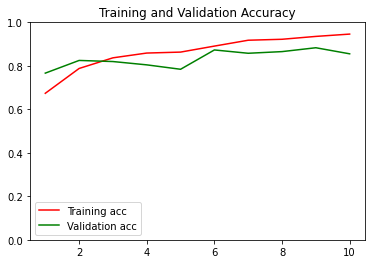

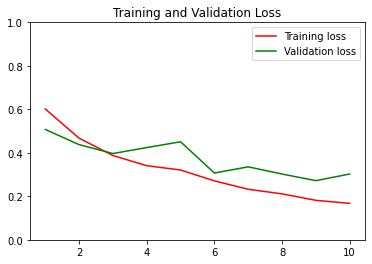

In [14]:
plot_summary(history)

### Q3 Median of training accuracy

In [15]:
np.median(history.history['acc'])

0.8770388960838318

### Q4 Standard deviation of training loss

In [16]:
np.std(history.history['loss'])

0.1305088367772516

## Data Augmentation

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 19s 241ms/step - loss: 0.4289 - acc: 0.8018 - val_loss: 0.2680 - val_acc: 0.8807
Epoch 2/10
80/80 [==============================] - 19s 239ms/step - loss: 0.4324 - acc: 0.8018 - val_loss: 0.4334 - val_acc: 0.7995
Epoch 3/10
80/80 [==============================] - 19s 235ms/step - loss: 0.3950 - acc: 0.8287 - val_loss: 0.3883 - val_acc: 0.8274
Epoch 4/10
80/80 [==============================] - 19s 242ms/step - loss: 0.3910 - acc: 0.8306 - val_loss: 0.5137 - val_acc: 0.7792
Epoch 5/10
80/80 [==============================] - 19s 236ms/step - loss: 0.3741 - acc: 0.8344 - val_loss: 0.4312 - val_acc: 0.8071
Epoch 6/10
80/80 [==============================] - 19s 237ms/step - loss: 0.3658 - acc: 0.8413 - val_loss: 0.4519 - val_acc: 0.8071
Epoch 7/10
80/80 [==============================] - 19s 240ms/step - loss: 0.3618 - acc: 0.8444 - val_loss: 0.7545 - val_acc: 0.6980
Epoch 8/10
80/80 [==============================] - 19s 233ms/step - 

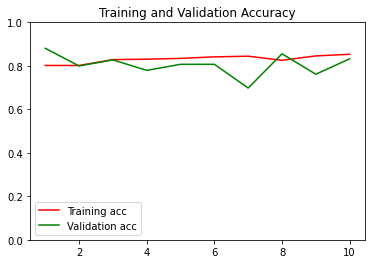

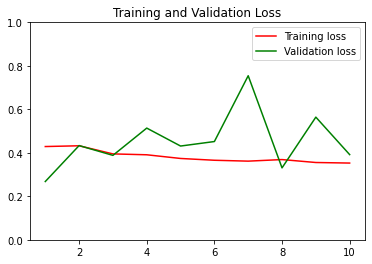

In [22]:
plot_summary(history)

### Q5  Mean for test loss

In [23]:
np.mean(history.history["val_loss"])

0.4527722805738449

### Q6 Avg test accuracy for epochs 5-10

In [24]:
np.mean(history.history["val_acc"][-5:])

0.7908629417419434